# Первое задание.
# Сравнение предложений

In [161]:
f = open("sentences.txt", "r")
text = f.read()

In [162]:
text = text.lower()

In [163]:
sentences = text.split('\n')
len(sentences)

22

С помощью регулярных выражений удалятся все "не буквы" из предложений,
а затем удаляются пустые строки

In [164]:
import re

tokens = re.split('[^a-z]', text.replace('\n',''))
tokens = set([token for token in tokens if token != ''])
len(tokens)

254

Создание словаря, в котором в качестве ключей будут использоваться слова, а в качестве содержимого их номер.

In [165]:
dictionary = dict(zip(tokens, range(0, len(tokens))))
len(dictionary)

254

In [166]:
split_sentences = [None] * len(sentences)
for i, sentence in enumerate(sentences):
    tmp = re.split('[^a-z]', sentence)
    split_sentences[i] = [token for token in tmp if token != '']

Создается матрица, содержащая частоты встречаемости слов в предложении, в которой каждая строка соответствует предложению, а столбец - слову.

In [167]:
import numpy as np

matrix = np.zeros(shape = (len(split_sentences), len(tokens)))

for i, words in enumerate(split_sentences):
    for word in words:
        matrix[i][dictionary[word]] = matrix[i][dictionary[word]] + 1
        
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [168]:
import scipy.spatial

cos_dist = [1] * matrix.shape[0]

for i in range(1, matrix.shape[0]):
    cos_dist[i] = scipy.spatial.distance.cosine(matrix[0], matrix[i])
cos_dist

[1,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [169]:
f.close()

# Второе задание
# Аппроксимация функции

In [211]:
import math
import scipy.linalg

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

def aprox_f(weights, x):
    result = 0
    for i, w in enumerate(weights):
        result += x**i * w
    return result

In [222]:
import matplotlib.pyplot as plt

b = np.array([f(1),f(15)])
A = np.array([[1, 1],[1, 15]])
w = scipy.linalg.solve(A, b)

x = np.arange(1, 16, 1)
y = [f(i) for i in x]

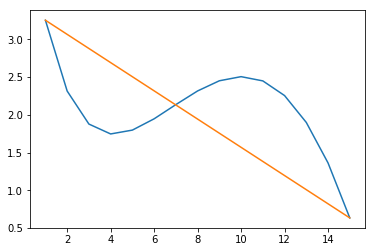

In [223]:
ynew = [aprox_f(w, i) for i in x]
plt.plot(x, y, x, ynew)
plt.show()

In [231]:
b = np.array([f(1), f(8), f(15)])
A = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
w = scipy.linalg.solve(A, b)

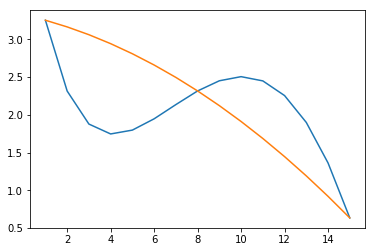

In [232]:
ynew = [aprox_f(w, i) for i in x]
plt.plot(x, y, x, ynew)
plt.show()

In [235]:
b = np.array([f(1), f(4), f(10), f(15)])
A = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
w = scipy.linalg.solve(A, b)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

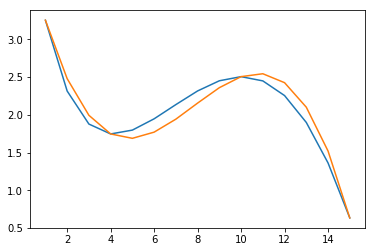

In [236]:
ynew = [aprox_f(w, i) for i in x]
plt.plot(x, y, x, ynew)
plt.show()